In [ ]:
# github link : https://github.com/khc0704/hmi/homework1

In [1]:
# import required package
import tensorflow as tf
import numpy as np

In [2]:
# load mnist data from tensorflow's datasets.
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

# all input are black-white pictures, so normalize them with (input/255).
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert input's shape to (size,size,1) to match the input_shape of Conv2D Layer.
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [3]:
# check input's shape
print(x_train[0].shape)
print(x_test[0].shape)

(28, 28, 1)
(28, 28, 1)


In [4]:
# define model's parameters
INPUT_SHAPE = x_train[0].shape

NUM_CLASSES = 10

KERNAL_SIZE = 3

FILTERS = 32

DROPOUT_RATE = 0.5

N_CONV2D = 2

FILTER_SIZE_GROWTH_RATE = 2

In [5]:
# return a list including [Conv2D,MaxPooling2D,Conv2D,MaxPooling2D.....................] with special filter_growth_rate
def conv2d_with_max_pooling(kernal_size, filters, filter_growth_rate = 1, n_stack = 1):
  layers = []
  for i in range(n_stack):
    layers.append(
        tf.keras.layers.Conv2D(
            filters=filters,
            kernel_size=kernal_size,
            activation='relu')
        )
    layers.append(
        tf.keras.layers.MaxPooling2D()
        )
    filters = filters * filter_growth_rate
  return layers


In [6]:
# build cnn model
input = tf.keras.layers.Input(shape=INPUT_SHAPE)

x = input
for layer in conv2d_with_max_pooling(kernal_size = KERNAL_SIZE, filters = FILTERS, filter_growth_rate = FILTER_SIZE_GROWTH_RATE, n_stack = N_CONV2D):
  x = layer(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128)(x)
x = tf.keras.layers.Dropout(DROPOUT_RATE)(x)

output = tf.keras.layers.Dense(NUM_CLASSES,activation='softmax')(x)

model = tf.keras.models.Model(inputs = input, outputs = output)

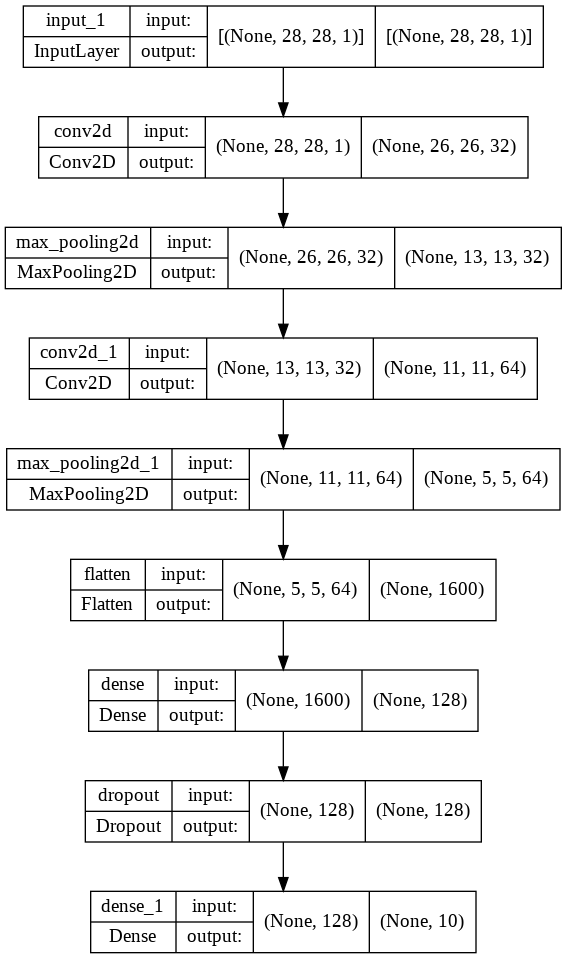

In [7]:
# plot model
tf.keras.utils.plot_model(model,show_shapes=True)

In [8]:
# define training's parameters
BATCH_SIZE = 64

EPOCH = 20

In [9]:
# compile model and train it
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer='adam',
    metrics=['accuracy']
    )

history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=BATCH_SIZE,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)]
    )

Epoch 1/20
750/750 [==============================] - 55s 71ms/step - loss: 0.2125 - accuracy: 0.9350 - val_loss: 0.0605 - val_accuracy: 0.9828
Epoch 2/20
750/750 [==============================] - 43s 57ms/step - loss: 0.0694 - accuracy: 0.9791 - val_loss: 0.0476 - val_accuracy: 0.9857
Epoch 3/20
750/750 [==============================] - 44s 58ms/step - loss: 0.0507 - accuracy: 0.9844 - val_loss: 0.0399 - val_accuracy: 0.9880
Epoch 4/20
750/750 [==============================] - 42s 56ms/step - loss: 0.0406 - accuracy: 0.9874 - val_loss: 0.0381 - val_accuracy: 0.9893
Epoch 5/20
750/750 [==============================] - 43s 58ms/step - loss: 0.0345 - accuracy: 0.9890 - val_loss: 0.0370 - val_accuracy: 0.9896
Epoch 6/20
750/750 [==============================] - 43s 58ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0370 - val_accuracy: 0.9892
Epoch 7/20
750/750 [==============================] - 44s 59ms/step - loss: 0.0250 - accuracy: 0.9917 - val_loss: 0.0450 - val_accuracy:

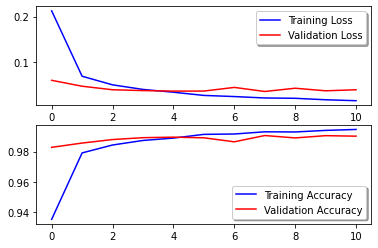

In [16]:
# plot loss and accuracy from history
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [17]:
# check the score of model
score = model.evaluate(x_test,y_test)
print('loss :',score[0],'\naccuracy :',score[1])

313/313 [==============================] - 3s 10ms/step - loss: 0.0266 - accuracy: 0.9918
loss : 0.02657640166580677 
accuracy : 0.9918000102043152


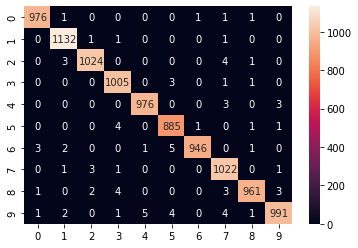

In [23]:
# plot the confusion matrix
import seaborn as sb

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1) 
confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)

sb.heatmap(confusion_mtx, annot=True, fmt='g')